In [1]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = 'ACPUDXxXEe_i9Mu-4Fdh'


In [2]:
%matplotlib notebook


In [225]:
# params = pd.read_csv('quandle CMHC.csv', header=None,  names=['desc', 'id'])
params = pd.read_csv('goodParams.csv')

# goodParams=[]
# for param in params['id']:
#     data = quandl.get('CMHC/'+param)
#     print(param, len(data))
#     if len(data)>2:
#         goodParams.append(param)

# for index,row in params.iterrows():      
#     provTag ='Prov' if row['prov'] else ''
#     print('#### ' + row['id'] + ' ' + provTag)
#     print(row['desc'] + '\n')

In [3]:
# data = quandl.get('CMHC/APP65', start_date='2010-01-01', end_date='2019-09-30')
data = quandl.get('CMHC/PRVYC')

data.tail()

,Before 1960,1960 - 1979,1980 - 1999,2000 or Later,Total
Date,,,,,
2014-10-31,3.5,2.9,2.6,2.8,3.0
2015-10-31,4.1,3.3,3.2,3.7,3.5
2016-10-31,4.0,3.5,3.5,4.3,3.7
2017-10-31,3.4,2.8,2.6,3.3,3.0
2018-10-31,2.6,2.4,2.1,2.7,2.4


In [3]:
price = quandl.get('CMHC/HPPA50')
absorbed = quandl.get('CMHC/HADMA')
length = quandl.get('CMHC/HLDMA')
completion= quandl.get('CMHC/HCDAA')
absorbedCompletion = quandl.get('CMHC/HACDMA')
unabsorbedCompletion = quandl.get('CMHC/HCUDMA')
starts = quandl.get('CMHC/HSDAA')
construction = quandl.get('CMHC/HUDAA')
vacancy = quandl.get('CMHC/PRVBT')


In [237]:
mortgageRates = quandl.get('BOC/V122521')

In [76]:
metrics = [absorbed, length,completion, absorbedCompletion, unabsorbedCompletion, starts, construction ]
column = 'All'

In [77]:
for x in metrics:
    x.rename(columns={'Total':'All'}, inplace=True)

In [78]:
import inspect
def var_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]



In [242]:
result = pd.DataFrame()
for x in metrics:
    newdf = pd.DataFrame(x[column]).rename(columns={column:var_name(x)})
    if len(result) == 0:
        result = newdf
    else:
        result = result.join(newdf, how='outer')
result = result.join(price['Average'], how='outer').rename(columns={'Average':'price'})
result = result.join(mortgageRates['Value'], how='outer').rename(columns={'Value':'mortgage'})

In [245]:
result

,absorbed,length,completion,absorbedCompletion,unabsorbedCompletion,starts,construction,price,mortgage
Date,,,,,,,,,
1990-01-31,8525.0,7.9,NaN,75.9,12083.0,NaN,NaN,215226.0,NaN
1990-02-28,7414.0,8.1,NaN,73.3,11749.0,NaN,NaN,223805.0,NaN
1990-03-31,7862.0,8.8,45979.0,73.0,12320.0,39811.0,120565.0,216910.0,NaN
1990-04-30,7681.0,8.3,NaN,67.6,13118.0,NaN,NaN,220628.0,NaN
1990-05-31,8291.0,7.7,NaN,68.7,13681.0,NaN,NaN,204053.0,NaN
...,...,...,...,...,...,...,...,...,...
2019-05-31,8322.0,12.9,NaN,78.5,15089.0,NaN,NaN,880506.0,5.34
2019-06-30,9051.0,14.5,48526.0,76.1,14986.0,58989.0,260586.0,799680.0,5.34
2019-07-31,10830.0,18.9,NaN,79.9,14995.0,NaN,NaN,812117.0,5.19


In [254]:
avro = result.rolling(window=3).mean()[['length','absorbedCompletion', 'price', 'mortgage']]

In [255]:
meano = result.rolling(window=3).sum()[['absorbed','unabsorbedCompletion']]

In [256]:
nullo = result[['completion', 'starts', 'construction']]

In [257]:
reso = avro.join(meano, how='outer').join(nullo, how='outer')

In [258]:
reso = reso.dropna()


In [4]:
result['price'].plot()

NameError: name 'result' is not defined

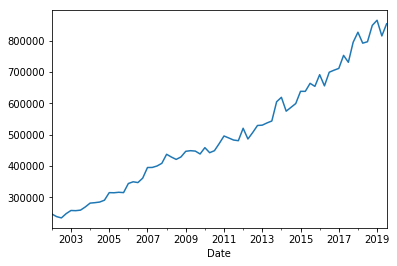

In [260]:
reso['price'].plot()

In [272]:
chango = (reso - reso.shift(periods=1))/reso.shift(periods=1)
chango

,length,absorbedCompletion,price,mortgage,absorbed,unabsorbedCompletion,completion,starts,construction
Date,,,,,,,,,
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,-1.035857e-01,-0.010761,-0.033868,0.044917,0.115689,-0.081206,0.069576,0.636967,0.200401
2002-09-30,-1.244444e-01,0.064867,-0.017525,-0.070136,0.309235,-0.141072,0.381237,-0.057978,0.008601
2002-12-31,1.370558e-01,-0.019296,0.058178,-0.007299,-0.044202,0.041819,-0.007167,-0.030971,-0.002335
2003-03-31,1.339286e-02,-0.016590,0.040316,-0.024510,-0.279431,-0.028435,-0.249240,-0.291349,-0.021189
...,...,...,...,...,...,...,...,...,...
2018-09-30,-4.063205e-02,-0.039040,0.005750,0.012642,-0.023698,0.002625,0.039117,-0.078699,-0.000187
2018-12-31,1.035294e-01,0.002116,0.065384,0.000000,0.051584,0.083188,0.005397,0.086061,0.016562
2019-03-31,-1.136262e-16,-0.022804,0.019369,0.000000,-0.251207,0.064040,-0.206704,-0.354519,-0.021006


In [273]:
chango.dropna(inplace=True)
chango['priceshift']=chango['price'].shift(-1)


In [274]:
chango.dropna(inplace=True)

In [278]:
x = chango[['absorbedCompletion', 'absorbed', 'unabsorbedCompletion', 'completion','starts', 'construction', 'mortgage']]
y = chango['price']
x = x.reset_index()
x = x.drop('Date', axis=1)
y = y.reset_index()
y = y.drop('Date', axis=1)
x.dropna(inplace=True)
y.dropna(inplace=True)

In [279]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.coef_

array([[-0.22050651,  0.13451968,  0.03596025, -0.14395049, -0.06898545,
        -0.05633291,  0.10909785]])

In [277]:
['absorbedCompletion', 'absorbed', 'unabsorbedCompletion', 'completion','starts', 'construction', 'mortgage']

['absorbedCompletion',
 'absorbed',
 'unabsorbedCompletion',
 'completion',
 'starts',
 'construction',
 'mortgage']

In [5]:
price['Average']
mortgageRates.plot()

NameError: name 'mortgageRates' is not defined

In [5]:
price

,1st 20%,2nd 40%,3rd 60%,4th 80%,Median,Average,Units
Date,,,,,,,
1990-01-31,105000.0,150000.0,200000.0,290000.0,175000.0,215226.0,6885.0
1990-02-28,105000.0,150000.0,200000.0,300000.0,175000.0,223805.0,5948.0
1990-03-31,110000.0,160000.0,205000.0,280000.0,180000.0,216910.0,5983.0
1990-04-30,108000.0,150000.0,200000.0,285000.0,175000.0,220628.0,6387.0
1990-05-31,100000.0,145000.0,190000.0,275000.0,165000.0,204053.0,6179.0
...,...,...,...,...,...,...,...
2019-08-31,385000.0,510000.0,675000.0,1000000.0,585000.0,849216.0,3509.0
2019-09-30,400000.0,535000.0,685000.0,1072000.0,600000.0,899848.0,3702.0
2019-10-31,395000.0,515000.0,690000.0,1085000.0,597500.0,830215.0,3496.0


<IPython.core.display.Javascript object>


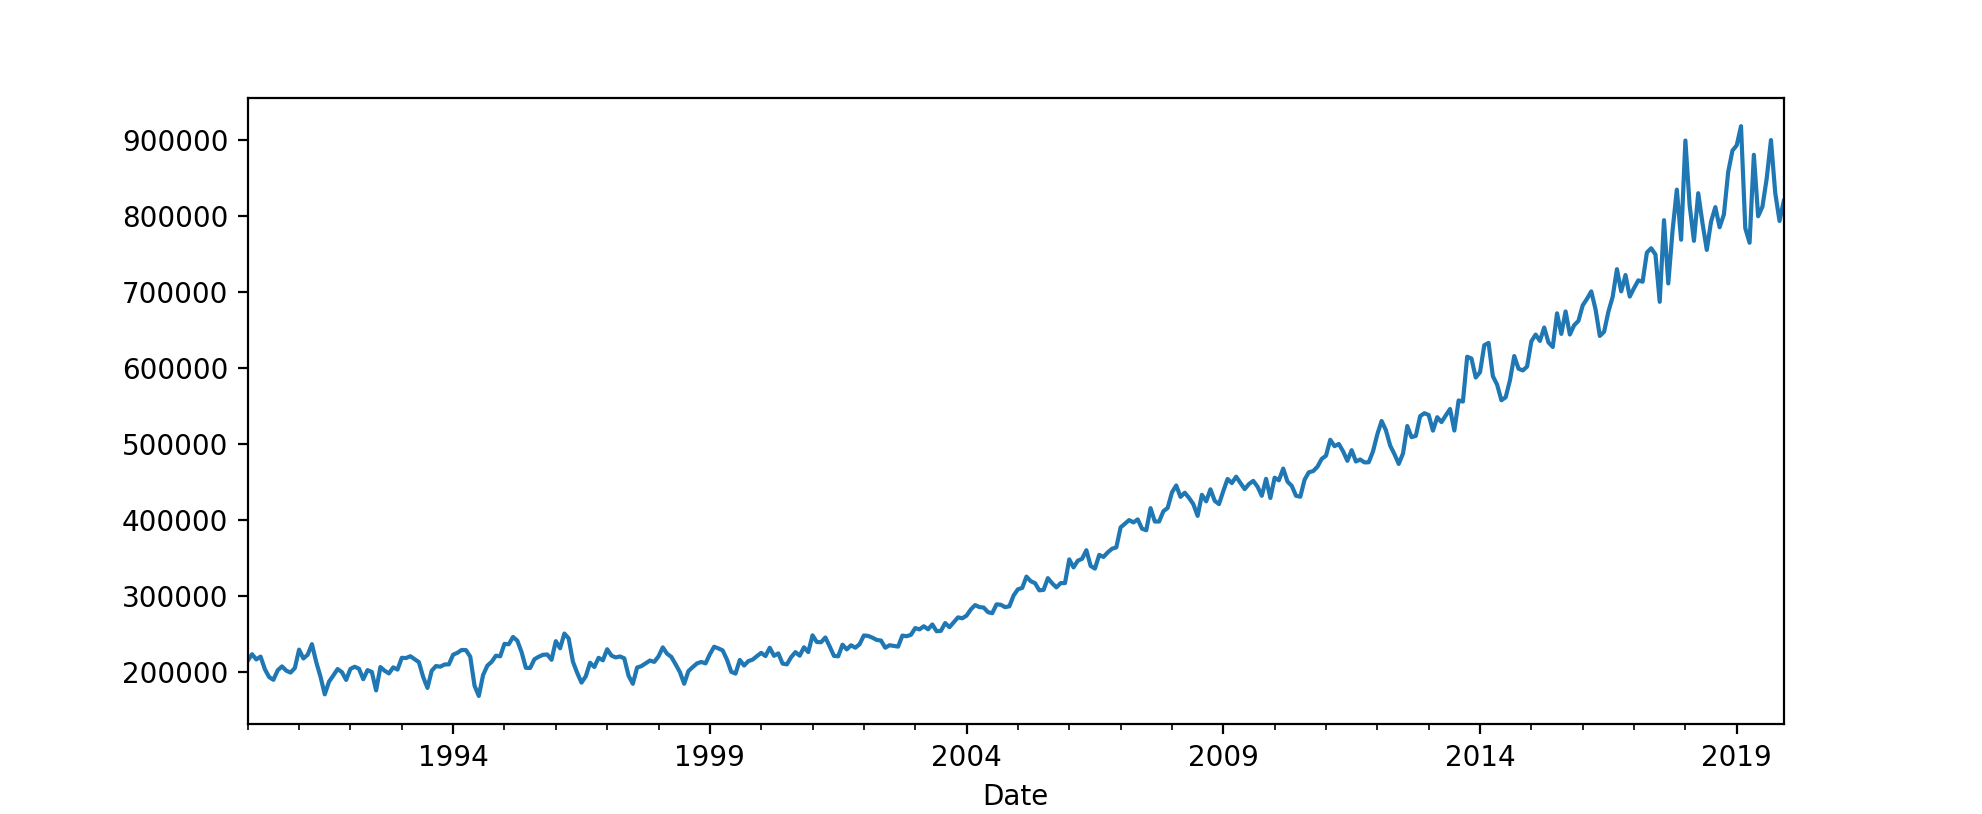

In [6]:
price['Average'].plot()

### IDEAS
Stacked bar graph: starts, under construction, complete, line price

bar graph: completion, absorbed, unabsorbed

histogram of price change%

correlation between absorbed and unabsorbed prices and future prices

population trends and prices

## BEST METRICS

#### HPPA50 Prov
Average, Median and Price Percentiles for Absorbed Homeowner and Condominium Units (in Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HPPU50 Prov
Average, Median and Price Percentiles for Unabsorbed Homeowner and Condominium Units (in Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HADMA Prov
Housing Absorbed Homeowner and Condominium Units by Dwelling Type (In Census Metropolitan Areas)

#### HLDMA Prov
Housing Average Length of Construction by Dwelling Type (In Census Metropolitan Areas)

#### HCDAA Prov
Housing Completions by Dwelling Type (All Areas)

#### HACDMA Prov
Housing Homeowner and Condominium Units Absorbed at Completion by Dwelling Type (In Census Metropolitan Areas)

#### HCUDMA Prov
Housing Inventory of Completed and Unabsorbed Homeowner and Condominium Units by Dwelling Type (In Census Metropolitan Areas)

#### HSDAA Prov
Housing Starts by Dwelling Type (All Areas)

#### HUDAA Prov
Housing Under Construction Inventory by Dwelling Type (All Areas)

#### PRVBT 
Vacancy Rates by Bedroom Type


## ALL METRICS

#### HPPA50 Prov
Average, Median and Price Percentiles for Absorbed Homeowner and Condominium Units (in Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HPPU50 Prov
Average, Median and Price Percentiles for Unabsorbed Homeowner and Condominium Units (in Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HAD50 
Housing Absorbed Homeowner and Condominium Units by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HADMA Prov
Housing Absorbed Homeowner and Condominium Units by Dwelling Type (In Census Metropolitan Areas)

#### HAI50 
Housing Absorbed Homeowner and Condominium Units by Intended Market (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HAIMA 
Housing Absorbed Homeowner and Condominium Units by Intended Market (In Census Metropolitan Areas)

#### HLD50 
Housing Average Length of Construction by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HLDMA Prov
Housing Average Length of Construction by Dwelling Type (In Census Metropolitan Areas)

#### HCDAA Prov
Housing Completions by Dwelling Type (All Areas)

#### HCDMA 
Housing Completions by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HCDMA50 
Housing Completions by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HCDMA10 
Housing Completions by Dwelling Type (in Census Metropolitan Areas, Census Agglomerations, and other selected municipalities with at least 10,000 people)

#### HCIMA50 
Housing Completions by Intended Market (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HCIMA 
Housing Completions by Intended Market (In Census Metropolitan Areas)

#### HCIMA10 
Housing Completions by Intended Market (In Census Metropolitan Areas, Census Agglomerations, and other, selected municipalities with at least 10,000 people)

#### HACD50 
Housing Homeowner and Condominium Units Absorbed at Completion by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HACDMA Prov
Housing Homeowner and Condominium Units Absorbed at Completion by Dwelling Type (In Census Metropolitan Areas)

#### HACI50 
Housing Homeowner and Condominium Units Absorbed at Completion by Intended Market (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HACIMA 
Housing Homeowner and Condominium Units Absorbed at Completion by Intended Market (In Census Metropolitan Areas)

#### HCUD50 
Housing Inventory of Completed and Unabsorbed Homeowner and Condominium Units by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HCUDMA Prov
Housing Inventory of Completed and Unabsorbed Homeowner and Condominium Units by Dwelling Type (In Census Metropolitan Areas)

#### HSDAA Prov
Housing Starts by Dwelling Type (All Areas)

#### HSDMA50 
Housing Starts by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HSDMA10 
Housing Starts by Dwelling Type (in Census Metropolitan Areas, Census Agglomerations, and other selected municipalities with at least 10,000 people)

#### HSDMA 
Housing Starts by Dwelling Type (In Census Metropolitan Areas

#### HSDAAS 
Housing Starts by Dwelling Type - Seasonally Adjusted (All Areas)

#### HSDMA10S 
Housing Starts by Dwelling Type - Seasonally Adjusted (in Census Metropolitan Areas, Census Agglomerations, and other selected municipalities with at least 10,000 people)

#### HSIMA50 
Housing Starts by Intended Market (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HSIMA 
Housing Starts by Intended Market (In Census Metropolitan Areas)

#### HSIMA10 
Housing Starts by Intended Market (In Census Metropolitan Areas, Census Agglomerations, and other, selected municipalities with at least 10,000 people)

#### HUDAA Prov
Housing Under Construction Inventory by Dwelling Type (All Areas)

#### HUDMA 
Housing Under Construction Inventory by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HUDMA50 
Housing Under Construction Inventory by Dwelling Type (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HUDMA10 
Housing Under Construction Inventory by Dwelling Type (in Census Metropolitan Areas, Census Agglomerations, and other selected municipalities with at least 10,000 people)

#### HUIMA50 
Housing Under Construction Inventory by Intended Market (In Census Metropolitan Areas and Census Agglomerations with at least 50,000 people)

#### HUIMA 
Housing Under Construction Inventory by Intended Market (In Census Metropolitan Areas)

#### HUIMA10 
Housing Under Construction Inventory by Intended Market (In Census Metropolitan Areas, Census Agglomerations, and other, selected municipalities with at least 10,000 people)

#### SUPUM 
Seniors' Number of Units and Proportion of Overall Universe for Bachelor Units and Private Rooms where Meals are included in Rent

#### SPSR 
Seniors' Proportion (%) of Standard Spaces by Rent Range

#### SRVU 
Seniors' Rental Housing Vacancy Rates by Unit Type

#### SSUT 
Seniors' Spaces by Unit Type

#### SUDB 
Seniors' Universe of Standard Spaces By Bedroom Type

#### SVRPM 
Seniors' Vacancy Rate and Average Rent for Bachelor/Private Rooms with Meals included in Rent

#### SVRH 
Seniors' Vacancy Rate and Average Rent for Heavy Care Spaces

#### PRVBT 
Vacancy Rates by Bedroom Type

#### PRVRQ 
Vacancy Rates by Rent Quartiles

#### PRVRR 
Vacancy Rates by Rent Ranges

#### PRVSS 
Vacancy Rates by Structure Size

#### PRVYC 
Vacancy Rates by Year of Construction

## OTHER

BOC/V122520	Conventional mortgage - 1-year	monthly

BOC/V121763	Conventional mortgage - 1-year	weekly

BOC/V122522	Conventional mortgage - 3-year	monthly

BOC/V121769	Conventional mortgage - 3-year	weekly

BOC/V122521	Conventional mortgage - 5-year	monthly

BOC/V121764	Conventional mortgage - 5-year	weekly

In [297]:
oneyear = quandl.get('BOC/V122520')
threeyear = quandl.get('BOC/V122522')
fiveyear = quandl.get('BOC/V122521')


In [307]:
oneyear.rename(columns={'Value':'oneyear'}, inplace=True)
threeyear.rename(columns={'Value':'threeyear'}, inplace=True)
fiveyear.rename(columns={'Value':'fiveyear'}, inplace=True)

In [309]:
morts = oneyear.join(threeyear).join(fiveyear)

In [312]:
morts['5v1']=morts['fiveyear']-morts['oneyear']
morts['5v3']=morts['fiveyear']-morts['threeyear']
morts['3v1']=morts['threeyear']-morts['oneyear']

In [321]:
morts

,oneyear,threeyear,fiveyear,5v1,5v3,3v1
Date,,,,,,
2001-12-31,4.60,5.75,4.60,0.0,-1.15,1.15
2002-01-31,4.55,6.05,4.55,0.0,-1.50,1.50
2002-02-28,4.55,5.75,4.55,0.0,-1.20,1.20
2002-03-31,5.30,6.60,5.30,0.0,-1.30,1.30
2002-04-30,5.40,6.75,5.40,0.0,-1.35,1.35
...,...,...,...,...,...,...
2019-05-31,3.64,4.29,3.64,0.0,-0.65,0.65
2019-06-30,3.64,4.29,3.64,0.0,-0.65,0.65
2019-07-31,3.64,4.29,3.64,0.0,-0.65,0.65


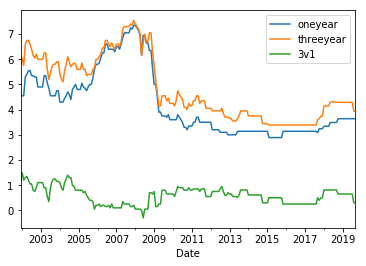

In [316]:
morts[['oneyear', 'threeyear', '3v1']].plot()

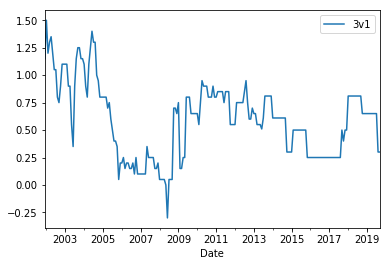

In [320]:
morts[['3v1']].plot()